In [1]:
pip install google-api-python-client 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



# Extracting the Data from the Youtube API V3

In [160]:


from googleapiclient.discovery import build
from dotenv import load_dotenv
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#access the data from the dotenv file
load_dotenv()

# setting up the youtube API key to access the channels
API_KEY = os.getenv("API_KEY")
youtube = build('youtube', 'v3', developerKey=API_KEY)
# this creates a connection to youtube API v3


In [161]:
# List of channel id which will be used to get the data from the corresponding channel

channel_ids = [" UCq-Fj5jknLsUf-MWSy4_brA", #Tseris
               "UCupvZG-5ko_eiXAupbDfxWw", #Cnn
               "UCvC4D8onUfXzvjTOM-dBfEA", #Marvel
               "UCMiJRAwDNSNzuYeN2uWa0pA", #Techchannel
               "UCYPvAwZP8pZhSMW8qs7cVCw", #India Today
               "UCb-xXZ7ltTvrh9C6DgB9H-Q", #Prasd Tech in telugu
               "UCBi2mrWuNuyYy4gbM6fU18Q", #ABC NEws
               "UCnQC_G5Xsjhp9fEJKuIcrSw", #Benshapiro
               "UCXuqSBlHAE6Xw-yeJA0Tunw", #LinusTech
               "UCsTcErHg8oDvUnTzoqsYeNw", #Unboxtheropy
               "UCOmcA3f_RrH6b9NmcNa4tdg", #CNET
               "UCOpcACMWblDls9Z6GERVi1A", #Screen Junkies
               "UCVtL1edhT8qqY-j2JIndMzg", #CineFix
               "UCLXo7UDZvByw2ixzpQCufnA", #Vox
               "UCvJJ_dzjViJCoLf5uKUTwoA", #CNBC
               "CoUxsWakJucWg46KW5RsvPw",  #Financial
               "UCX6b17PVsYBQ0ip5gyeme-Q", #CrashCourse
               "UC4a-Gbdw7vOaccHmFo40b9g", #Khan Academy
               "UCsooa4yRKGN_zEE8iknghZA", #Ted-ed
               "UCq2E1mIwUKMWzCA4liA_XGQ", #PickUpLimes
               "UCJ24N4O0bP7LGLBDvye7oCA", #Matt
               "UCSPYNpQ2fHv9HJ-q6MIMaPw", #Financialdiet
               "UCFKE7WVJfvaHW5q283SxchA", #Yoga with Adriene
              ]


In [162]:


def get_channel_stats(youtube, channel_ids):
    """
    This function retrieves channel statistics from the YouTube API.

    Parameters:
    youtube (googleapiclient.discovery.Resource): An authenticated instance of the YouTube API.
    channel_ids (list): A list of YouTube channel IDs for which to retrieve statistics.
    Returns:
    list: A list of dictionaries, where each dictionary contains the following keys:
          - Channel_name: The name of the YouTube channel.
          - Subscribers: The number of subscribers to the channel.
          - Views: The total number of views on the channel.
          - Total_videos: The total number of videos uploaded to the channel.
          - playlist_id: The ID of the channel's upload playlist.
    """
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


In [163]:
# Calling the function to get the channel statistics 
channel_statistics = get_channel_stats(youtube, channel_ids)

# Storing the data in a pandas dataframe
channel_data = pd.DataFrame(channel_statistics)

channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,T-Series,289000000,289108878422,22914,UUq-Fj5jknLsUf-MWSy4_brA
1,Khan Academy,8830000,2156066993,8637,UU4a-Gbdw7vOaccHmFo40b9g
2,Yoga With Adriene,13100000,1588696962,768,UUFKE7WVJfvaHW5q283SxchA
3,India Today,10100000,4552327150,227283,UUYPvAwZP8pZhSMW8qs7cVCw
4,CNET,3960000,1899591601,23224,UUOmcA3f_RrH6b9NmcNa4tdg
5,Unbox Therapy,24800000,4813127795,2339,UUsTcErHg8oDvUnTzoqsYeNw
6,CNBC,3840000,1798796991,15542,UUvJJ_dzjViJCoLf5uKUTwoA
7,TED-Ed,21200000,4227731329,2239,UUsooa4yRKGN_zEE8iknghZA
8,Matt D'Avella,3910000,311780858,435,UUJ24N4O0bP7LGLBDvye7oCA
9,Vox,12500000,3670363991,1788,UULXo7UDZvByw2ixzpQCufnA


In [164]:
video_ids = []

# Getting the video ids from the channel's upload playlist
for channel_id in channel_data['playlist_id']:
    request = youtube.playlistItems().list(
                        part='snippet',
                        playlistId = channel_id,
                        maxResults = 50
                        )
    response = request.execute()
            
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['snippet']['resourceId']['videoId']) #appending the video ids to the list

In [165]:
def get_video_details(youtube, video_ids):
    """
    Retrieves detailed statistics for a list of YouTube video IDs.

    Parameters:
    youtube (googleapiclient.discovery.Resource): An authenticated instance of the YouTube API.
    video_ids (list): A list of YouTube video IDs for which to retrieve statistics.

    Returns:
    list: A list of dictionaries, where each dictionary contains the following keys:
          - Title: The title of the video.
          - Published_date: The date and time when the video was published.
          - Views: The number of views on the video.
          - Likes: The number of likes on the video.
          - Categories: The category ID of the video.
          - Comments: The number of comments on the video.
    """
    all_video_stats = []

    for i in range(0, len(video_ids), 50):  # YouTube API allows max 50 videos per request
        request = youtube.videos().list(
            part="snippet,statistics",
            id=",".join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response.get("items", []):  # Prevent KeyError if 'items' is missing
            video_stats = dict(
                Title=video["snippet"]["title"],
                Published_date=video["snippet"]["publishedAt"],
                Views=video["statistics"].get("viewCount", 0),  # .get() to handle missing data
                Likes=video["statistics"].get("likeCount", 0),
                Categories = video["snippet"]["categoryId"],
                Comments=video["statistics"].get("commentCount", 0)  # Removed 'dislikeCount'
            )
            all_video_stats.append(video_stats)

    return all_video_stats


In [172]:
# Getting the each video details
video_details = get_video_details(youtube, video_ids)
# storing the details into a dataframe
video_data = pd.DataFrame(video_details)

video_data.head(100)

,Title,Published_date,Views,Likes,Categories,Comments
0,Chaar Kadam - Trending Version (Lyrics) | PK |...,2025-03-16T12:30:03Z,1049,122,10,45
1,Khulle Aasmaan (Lyrical Video) - Juss | MixSin...,2025-03-16T11:01:18Z,19666,1194,10,136
2,"Beparwaiyaan (Full Audio): Digvijay Rathee, Sh...",2025-03-16T09:30:09Z,2887,177,10,46
3,JAANLEWA (Lyrical Video): Amrit Maan | Mxrci |...,2025-03-16T05:30:58Z,61937,2588,10,195
4,Public Opinion On #TheDiplomat 🇮🇳 | John Abrah...,2025-03-15T15:37:50Z,14255,454,10,28
5,Jee Le Zaraa - Trending Version (Lyrics) | Tal...,2025-03-15T14:30:09Z,41505,1241,10,92
6,Guzarish - Trending Version (Lyrics) | Aamir K...,2025-03-15T13:31:29Z,80200,3137,10,256
7,CRAZXY: Yun Hi Chale Gaye (Lyrical Video) | So...,2025-03-15T12:30:35Z,4309,99,10,20
8,Artiste: Roye Har Pal Dil Ye (Lyrical) | Santo...,2025-03-15T10:35:02Z,48254,1549,10,128
9,The Diplomat (Review): High Commission of Indi...,2025-03-15T09:15:11Z,24802,324,10,29


In [173]:
categories = video_data['Categories']

category_data = []
for i in categories:
    request = youtube.videoCategories().list(
      part = 'snippet',
      id = i
   )

    response = request.execute()
    
    for vid in response.get('items',[]):
       category_data.append(vid['snippet']['title'])
categories_column = pd.DataFrame(category_data)

video_data['Categories'] = categories_column

TimeoutError: The read operation timed out

In [174]:
# displaying all rows and columns

pd.set_option('display.max_rows', None)


# Uploading the data into a csv file
video_data.to_csv('youtube_data.csv',index=False)

change_date = []

for data in video_data['Published_date']:
    data = datetime.strptime(str(data), "%Y-%m-%dT%H:%M:%SZ").strftime('%Y-%m-%d')
    video_data['Published_date'] = data



# Displaying the first 50 rows of the data
video_data.head()


,Title,Published_date,Views,Likes,Categories,Comments
0,Chaar Kadam - Trending Version (Lyrics) | PK |...,2025-02-21,1049,122,10,45
1,Khulle Aasmaan (Lyrical Video) - Juss | MixSin...,2025-02-21,19666,1194,10,136
2,"Beparwaiyaan (Full Audio): Digvijay Rathee, Sh...",2025-02-21,2887,177,10,46
3,JAANLEWA (Lyrical Video): Amrit Maan | Mxrci |...,2025-02-21,61937,2588,10,195
4,Public Opinion On #TheDiplomat 🇮🇳 | John Abrah...,2025-02-21,14255,454,10,28


In [175]:
video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1100 non-null   object
 1   Published_date  1100 non-null   object
 2   Views           1100 non-null   object
 3   Likes           1100 non-null   object
 4   Categories      1100 non-null   object
 5   Comments        1100 non-null   object
dtypes: object(6)
memory usage: 51.7+ KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Videos')

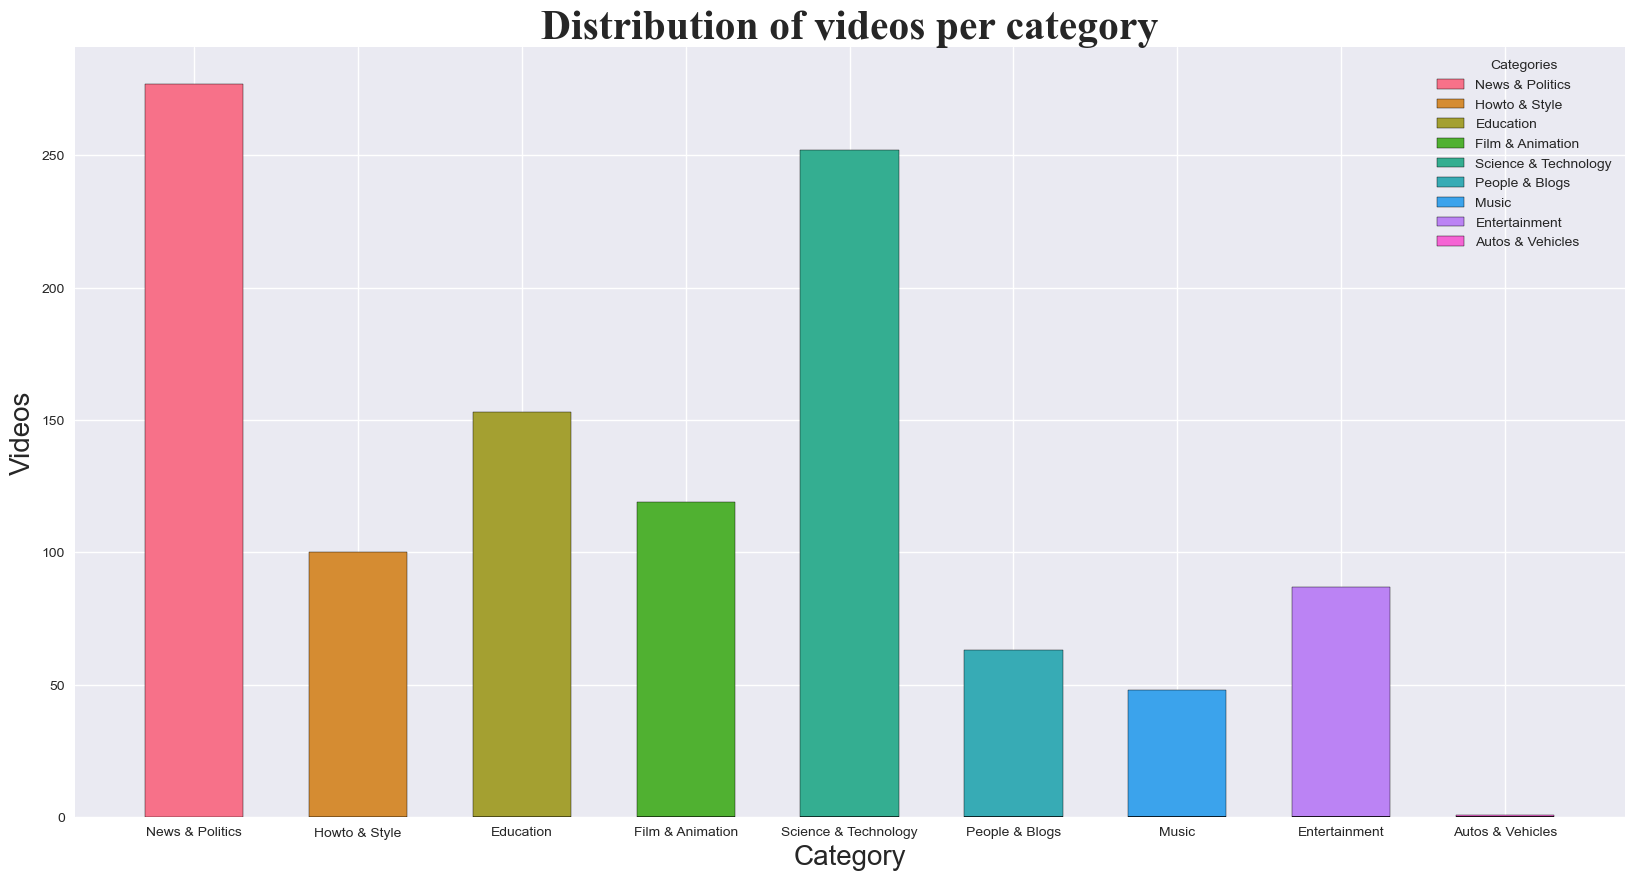

In [ ]:
# Plotting number of views per category

plt.figure(figsize=(20,10))
sns.histplot(x ='Categories',data=video_data,palette='husl', hue='Categories',alpha=1,shrink=0.6)
plt.title('Distribution of videos per category', fontsize=30, fontweight='bold',fontname='times new roman')
plt.xlabel('Category', fontsize=20)
plt.ylabel('Videos', fontsize=20)




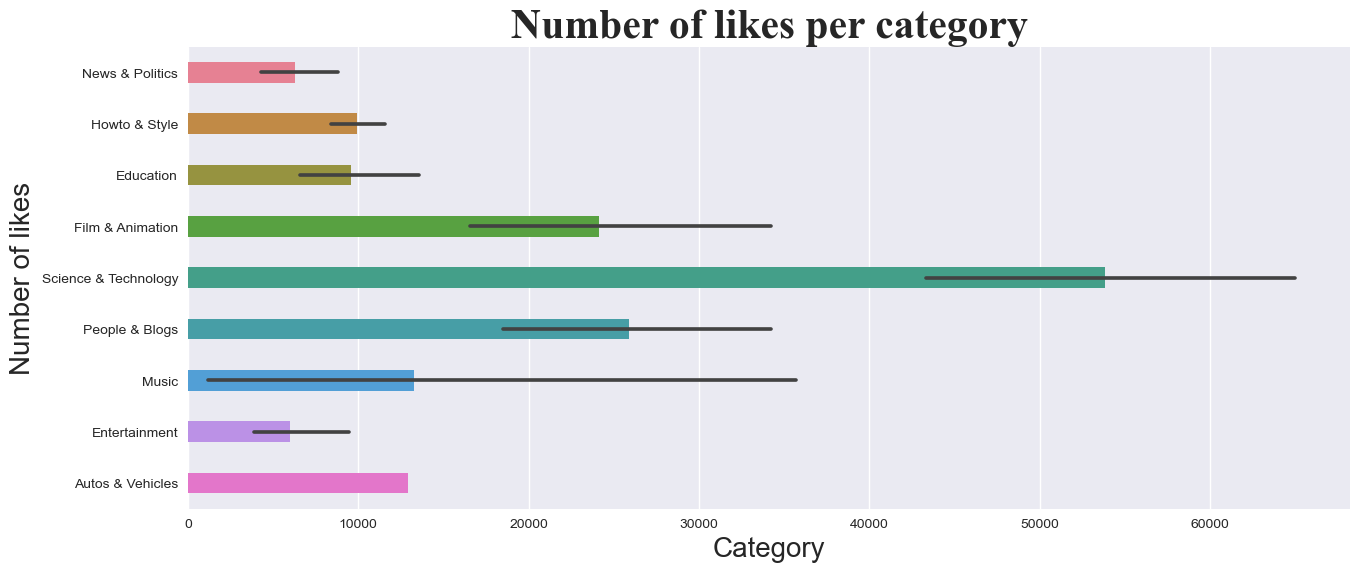

In [115]:
# Plotting number of likes per category
plt.figure(figsize=(15,6))
plt.style.use('seaborn-v0_8')

csv_data = pd.read_csv('youtube_data.csv')

sns.barplot( y='Categories',x='Likes', data=csv_data,palette='husl',hue='Categories',width=0.4)
plt.title('Number of likes per category', fontsize=30, fontweight='bold',fontname='times new roman')
plt.xlabel('Category', fontsize=20)
plt.ylabel('Number of likes', fontsize=20)

plt.show()

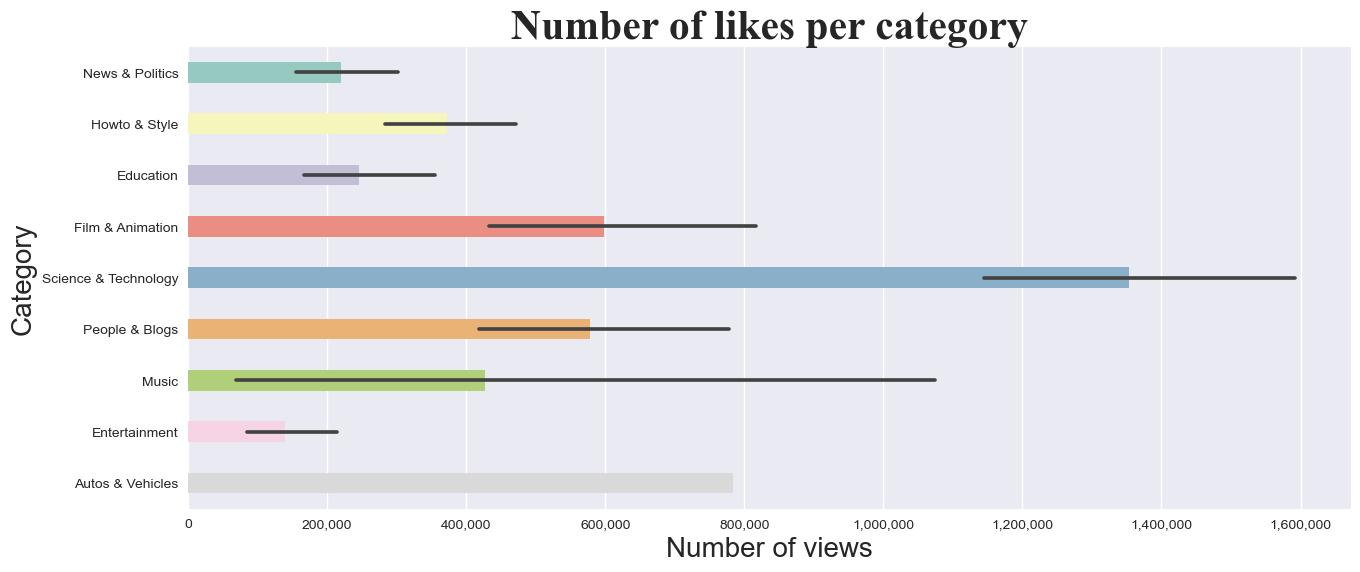

In [ ]:
import matplotlib.ticker as ticker

# Plotting number of likes per category
plt.figure(figsize=(15,6))
plt.style.use('seaborn-v0_8')

csv_data = pd.read_csv('youtube_data.csv')
ax = plt.gca()
sns.barplot( y='Categories',x='Views', data=csv_data,palette='Set3',hue='Categories',width=0.4)
plt.title('Number of likes per category', fontsize=30, fontweight='bold',fontname='times new roman')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Number of views', fontsize=20)
plt.ylabel('Category', fontsize=20)
plt.show()

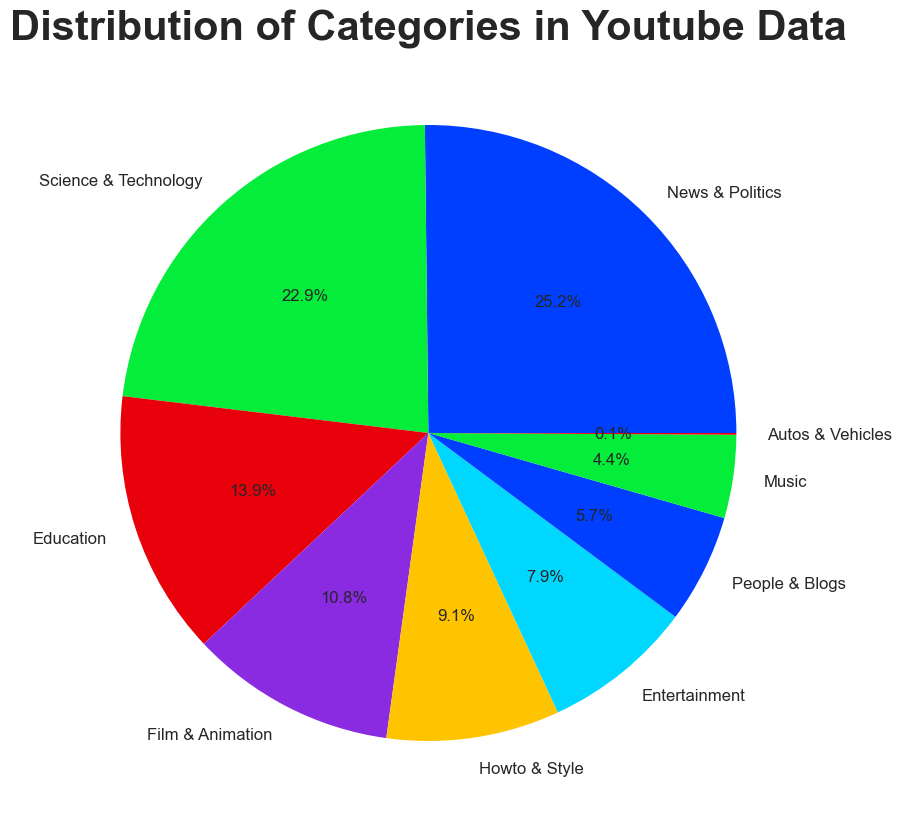

In [130]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,10))
plt.pie(video_data['Categories'].value_counts(),labels=video_data['Categories'].value_counts().index,autopct="%1.1f%%",textprops={'fontsize':12})
plt.title("Distribution of Categories in Youtube Data", fontsize=30, fontweight='bold')
plt.show()

# Extracting the data from the Kaggle Dataset

In [196]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd 

api = KaggleApi()
api.authenticate()

api.dataset_download_files('rmisra/news-category-dataset',path='./',unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset


ConnectionError: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/download/rmisra/news-category-dataset?raw=false (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002113372C410>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)"))

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df = pd.read_json('News_Category_Dataset_v3.json',lines=True)
df.head(10)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
8,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
9,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


In [197]:

kaggle_data = pd.read_json('News_Category_Dataset_v3.json',lines=True)

kaggle_data.to_csv('kaggle_data.csv',index=False)


In [198]:
kaggle_data = pd.read_csv('kaggle_data.csv')

kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209521 non-null  object
 2   category           209527 non-null  object
 3   short_description  189815 non-null  object
 4   authors            172109 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [199]:
kaggle_data.dropna(subset = ['headline','short_description','authors'],inplace= True)

kaggle_data = kaggle_data.drop(columns = ['link','short_description'])


In [200]:
kaggle_data = kaggle_data.sample(60000)
pd.set_option('display.max_rows',None)

kaggle_data.to_csv('kaggle_data.csv',index=False)

dataset = pd.read_csv('kaggle_data.csv')
video_data = pd.read_csv('youtube_data.csv')


In [ ]:
category_mapping = {
    "U.S. NEWS": "News & Politics",
    "WORLD NEWS": "News & Politics",
    "POLITICS": "News & Politics",
    "WEIRD NEWS":"News & Politics",
    "CRIME":"News & Politics",
    "COMEDY": "Entertainment",
    "MEDIA":"Entertainment",
    "ENTERTAINMENT": "Entertainment",
    "ARTS & CULTURE": "Entertainment",
    "HOME & LIVING":"People & Blogs",
    "WOMEN":"People & Blogs",
    "PARENTING": "People & Blogs",
    "EDUCATION": "Education",
    "STYLE & BEAUTY": "Howto & Style",
    "SPORTS": "Health & Sports",
    "HEALTHY LIVING": "Health & Sports",
    "WELLNESS": "Health & Sports",
    "FOOD & DRINK": "People & Blogs",
    "BUSINESS": "Business",
    "MONEY": "Business",
    "SCIENCE": "Science & Technology",
    "TRAVEL":"Travel & Events",
    "ENVIRONMENT": "Travel & Events",
    "TECHNOLOGY": "Science & Technology",
    "TECH": "Science & Technology"
}

# Apply the category mapping
kaggle_data["Categories"] = kaggle_data["category"].map(category_mapping).fillna("Others")



# remvoving the data with others category mapping 
kaggle_data = kaggle_data[kaggle_data["Categories"] != "Others"]


category_counts = kaggle_data["Categories"].value_counts()




In [202]:
kaggle_data["views"] = video_data.groupby("Categories")["Views"].transform(lambda x: x.fillna(x.mean()))
kaggle_data["likes"] = video_data.groupby("Categories")["Likes"].transform(lambda x: x.fillna(x.mean()))
kaggle_data["comments"] = video_data.groupby("Categories")["Comments"].transform(lambda x: x.fillna(x.mean()))


In [204]:
kaggle_data = kaggle_data.drop(columns=['category'])
kaggle_data.to_csv('kaggle_data.csv')

Text(0, 0.5, 'Videos')

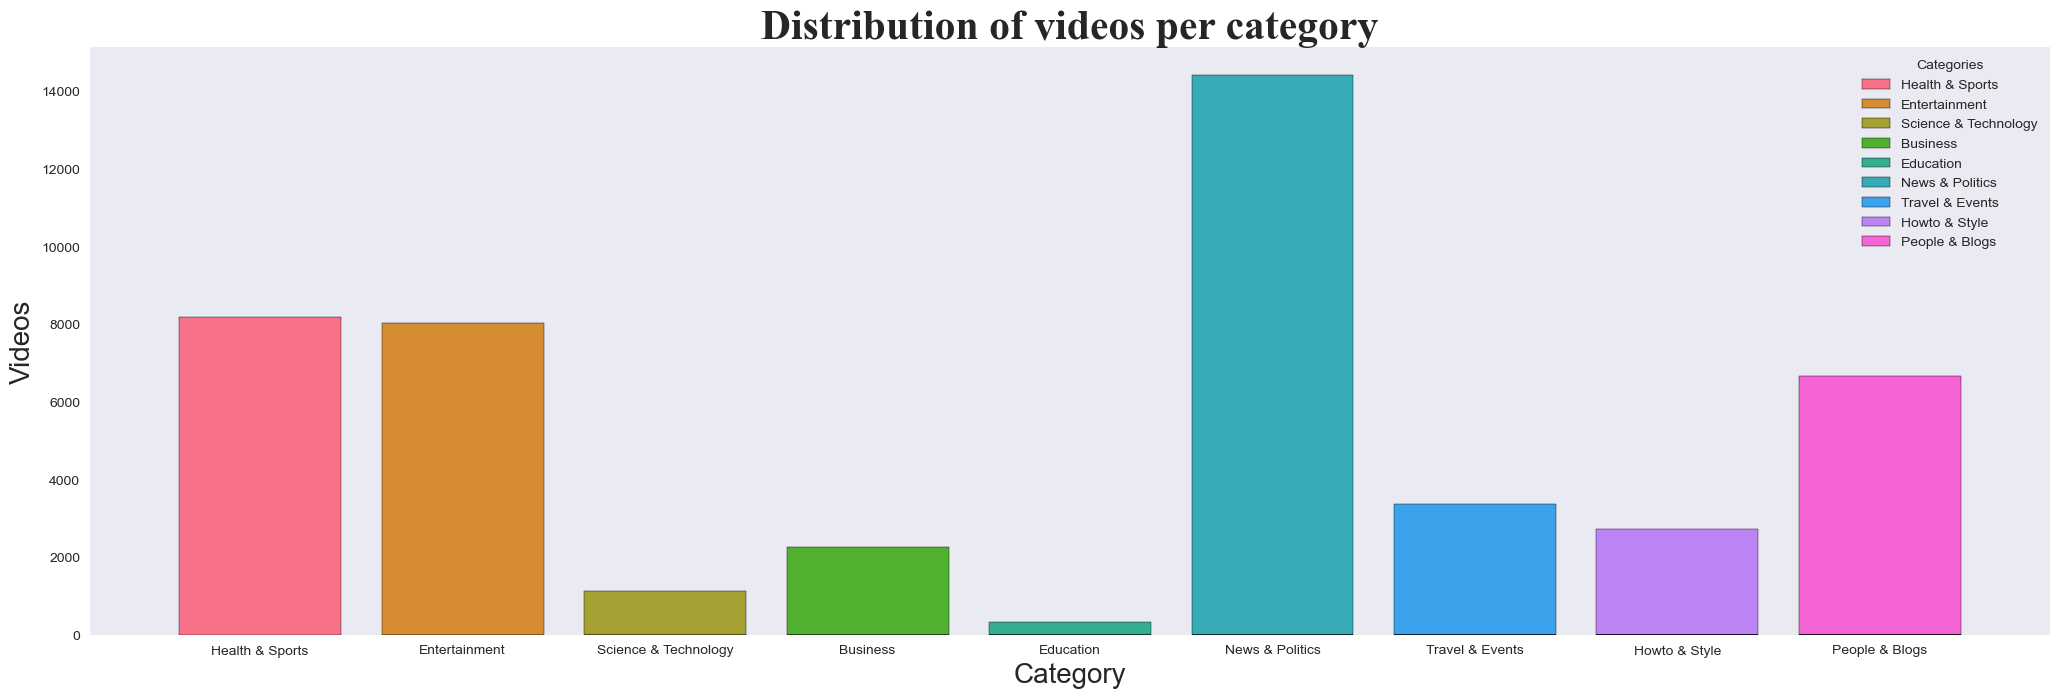

In [209]:
# Plotting number of views per category

plt.figure(figsize=(20,6))
sns.histplot(x ='Categories',data=kaggle_data,palette='husl', hue='Categories',alpha=1,shrink=0.8)
plt.title('Distribution of videos per category', fontsize=30, fontweight='bold',fontname='times new roman')
plt.xlabel('Category', fontsize=20)
plt.ylabel('Videos', fontsize=20)


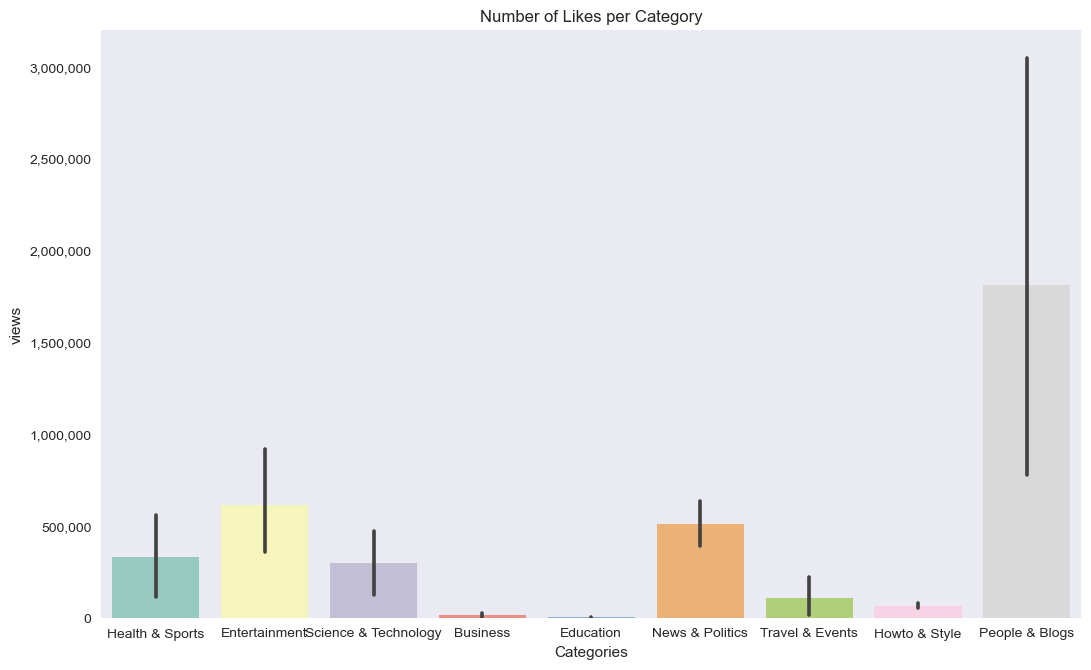

In [222]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.barplot(y='views',x='Categories',data=kaggle_data,palette='Set3',hue='Categories')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Title and labels
plt.title('Number of Likes per Category')
# Show plot
plt.show()

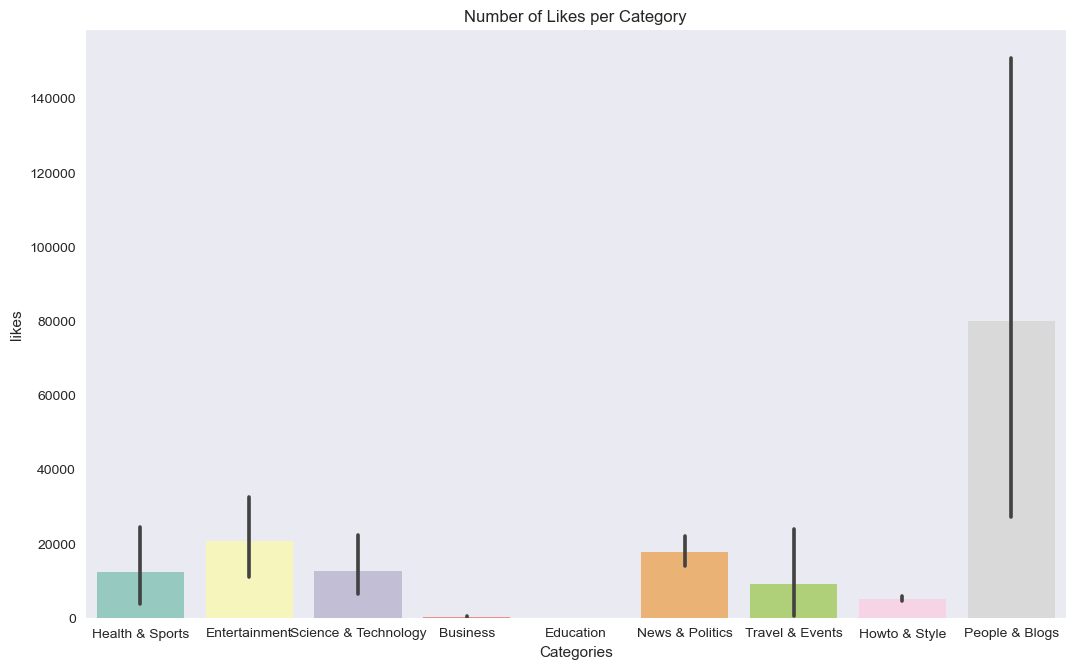

In [219]:
plt.figure(figsize=(10, 6))

sns.barplot(y='likes',x='Categories',data=kaggle_data,palette='Set3',hue='Categories')
# Title and labels
plt.title('Number of Likes per Category')
# Show plot
plt.show()

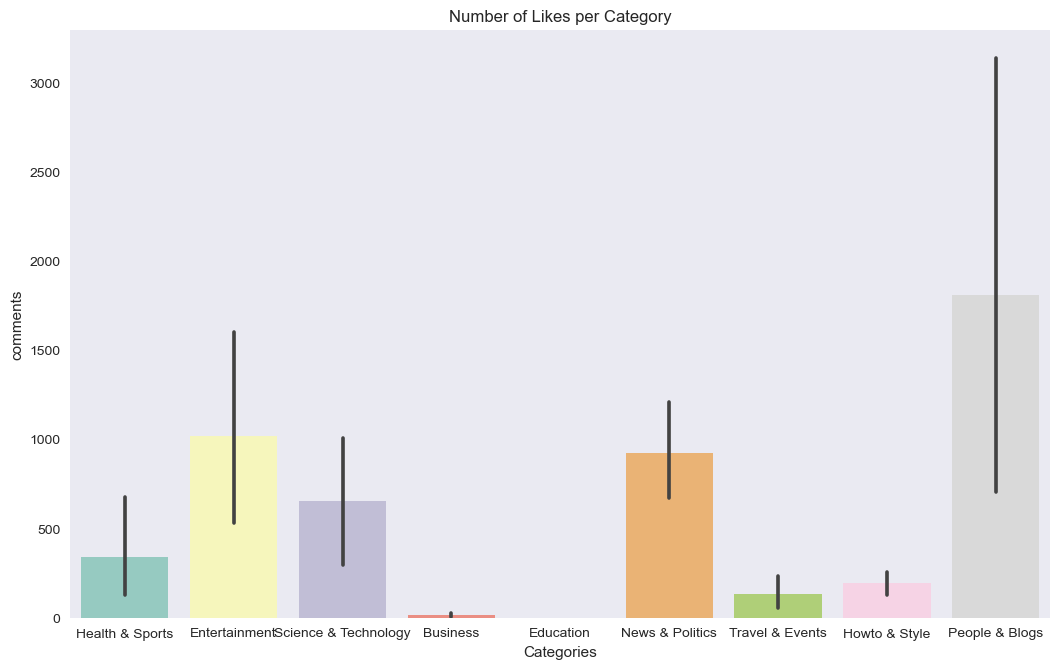

In [218]:
plt.figure(figsize=(10, 6))

sns.barplot(y='comments',x='Categories',data=kaggle_data,palette='Set3',hue='Categories')
# Title and labels
plt.title('Number of Likes per Category')
# Show plot
plt.show()

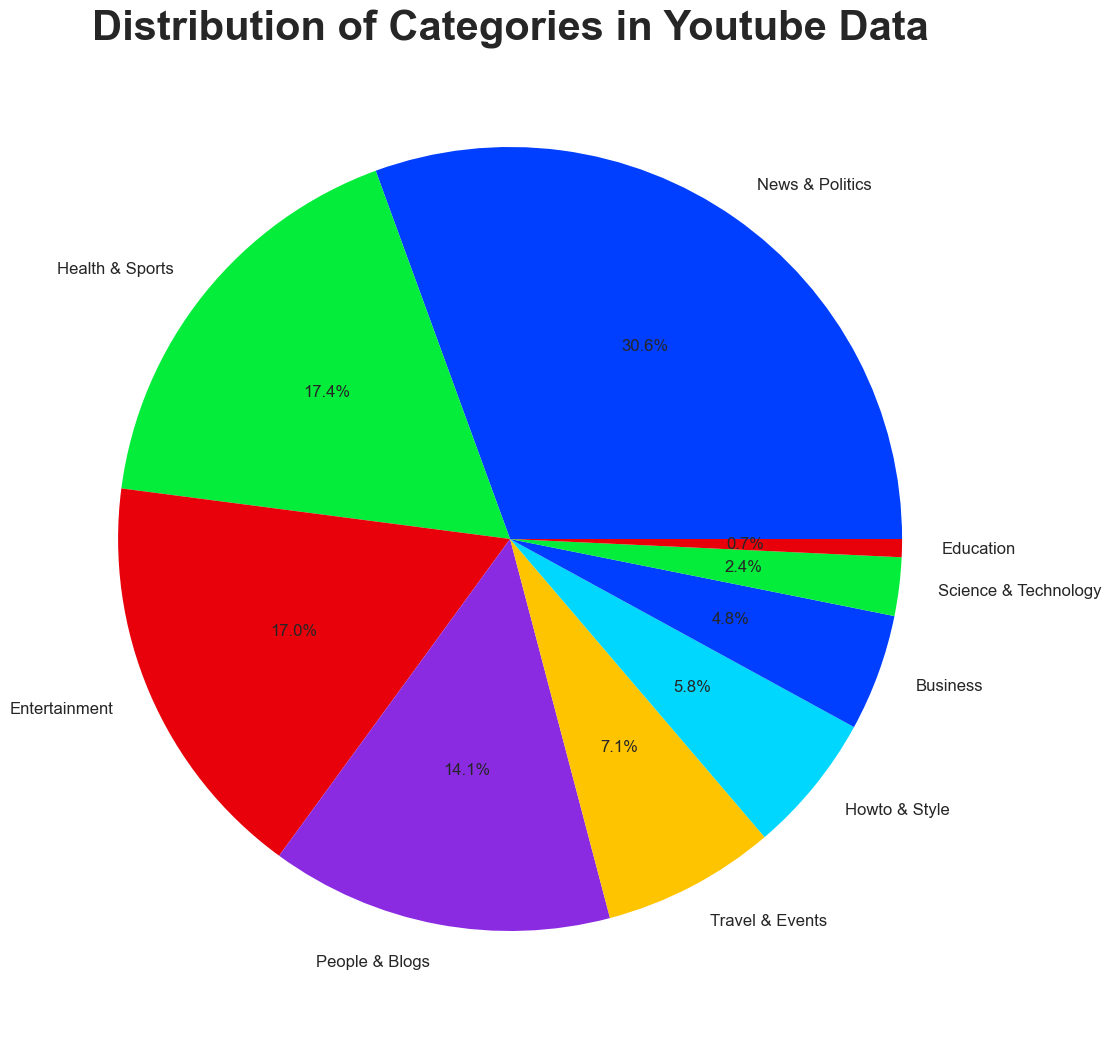

In [223]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,10))
plt.pie(kaggle_data['Categories'].value_counts(),labels=kaggle_data['Categories'].value_counts().index,autopct="%1.1f%%",textprops={'fontsize':12})
plt.title("Distribution of Categories in Youtube Data", fontsize=30, fontweight='bold')
plt.show()